# Статистический анализ данных / Python
## Задание 2

**Правила:**

* Дедлайн **24 ноября 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

%matplotlib inline

---------------

### Задача 1. (5 баллов)
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений в модели нормального распределения. 
Чтобы не плодить код, напишите следующую функцию.

In [2]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None)  # ограничение по оси y
    ):
    x_data = np.arange(len(sample))
    plt.figure(figsize=[10,10])
    
    plt.plot(left, label='Левая граница интервала')
    plt.plot(right, label='Правая граница интервала')
    plt.plot(est, label='Оценка')
    plt.fill_between(x = x_data, y1=left, y2=right, alpha=0.1)
    if not sample is None:
        plt.scatter(y = sample, x = x_data, label='Наблюдения')
    if not ylim is None:
        plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Количество наблюдений')

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $\mathcal{N}(0, 1)$; асимптотический доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

3. Выборка из распределения Коши; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


In [3]:
def get_CI(sample, T):
    lower=list()
    est = list()
    upper = list();
    
    for n in range(1, len(sample)+1):
        sum_sample = sample[:n]
        mu = np.mean(sum_sample)
        sigma = np.std(sum_sample)
        lower.append(mu-T*sigma/math.sqrt(n))
        est.append(mu)
        upper.append(mu+T*sigma/math.sqrt(n))
    return lower, est, upper

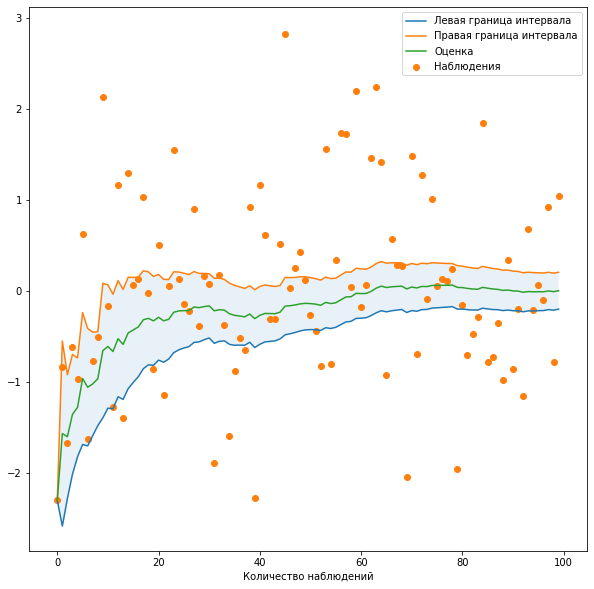

In [4]:
#1
norm_sample = np.random.normal(size=100)
z = sps.norm.ppf(q=0.975)

lower, est, upper = get_CI(norm_sample,z)
draw_confidence_interval(lower, upper,est, norm_sample)

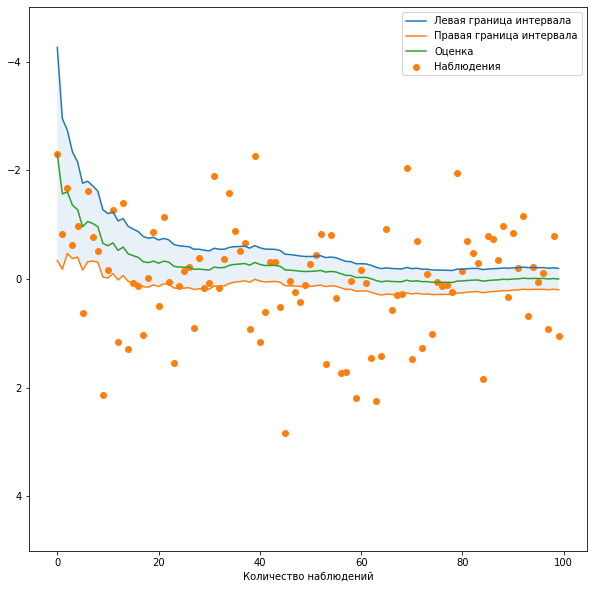

In [5]:
#2 
def get_assimp_CI(sample, T):
    lower=list()
    est = list()
    upper = list();
    
    for n in range(1, len(sample)+1):
        sum_sample = sample[:n]
        mu = np.mean(sum_sample)
        sigma = np.std(sum_sample)
        lower.append(mu - T*1/(math.sqrt(n)))
        est.append(mu)
        upper.append(mu + T*1/(math.sqrt(n)))
    return lower, est, upper

lower, est, upper = get_assimp_CI(norm_sample,z)
draw_confidence_interval(lower, upper,est, norm_sample, [5, -5])

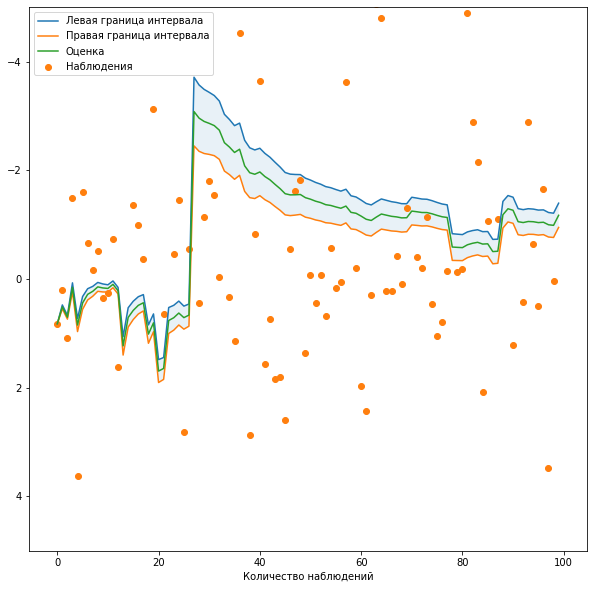

In [6]:
# 3
cauchy_sample = np.random.standard_cauchy(size=100)
c = sps.cauchy.pdf(0.975)

lower, est, upper = get_CI(cauchy_sample,c)
draw_confidence_interval(lower, upper,est, cauchy_sample, [5,-5])

**Вывод:** 
- Точный ДИ МО нормального распределения шире точного ДИ МО распределения Коши, но сужается быстрее с ростом выборки
- Асимптотический ДИ МО нормального распределения уже точного ДИ МО нормального распределения

---------------

### Задача 2. (5 баллов)

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine"> wine dataset </a> и выберите произвольные 3 произвольных
столбца с действительными числами, а также столбцы `Total phenols` и `Alcohol`. 

С помощью `seaborn.PairGrid` постройте таблицу графиков,
состоящую из
* одномерных ядерных оценок плотности по диагонали;
* двумерных ядерных оценок плотности ниже диагонали;
* scatter-plot выше диагонали (`plt.scatter`)


При возникновении затруднений посмотрите обучающий ноутбук по seaborn .

In [7]:
from sklearn.datasets import load_wine

data = pd.DataFrame(load_wine().data)
data.columns = load_wine().feature_names
data['class'] = load_wine().target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
selected_columns = ['total_phenols', 'alcohol', 'ash', 'malic_acid', 'flavanoids']

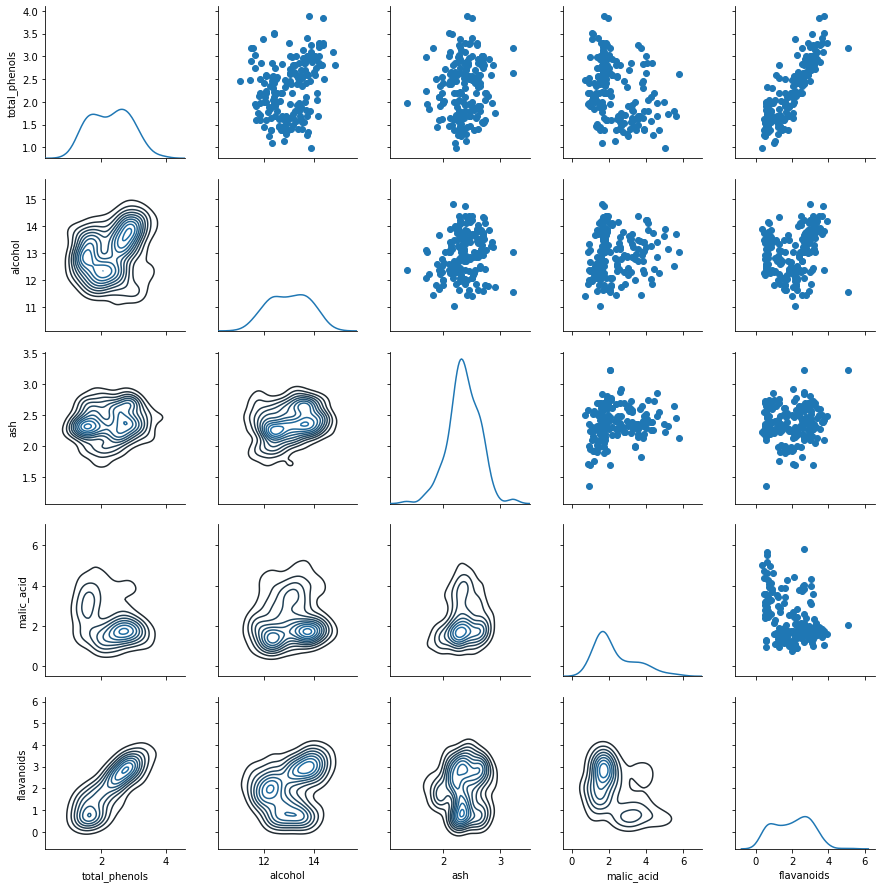

In [9]:
g = sns.PairGrid(data[selected_columns])
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

Какие графики более наглядны: ядерные оценки плотности или scatter plots? 


Что можно сказать про распределения значений величин? С чем это может быть связано? (обратите внимание на пики)

**Ответ:** 
- ядерные оценки плотности нагляднее, чем scatter plots. 
- Распределения величин по большей части би-модальные с большим разбросом (кроме ash)
- Би-модальность может быть связана с относительно равномерным распределением наблюдений

Пока что мы строили графики для значений признаков вин вне зависимости от их сорта (колонка `Class`). 
Это нужно для того, чтобы найти основные свойства распределения: какие значения оно принимает чаще всего, сколько пиковых значений у оценки плотности, насколько велик разброс значений и тд. 

Однако сейчас мы не знаем, как влияет сорт вина на значения признаков и стоит ли им пренебрегать.
Проведем небольшое иследование

Постройте графики одномерных оценок плотности для выбранных признаков, которые нарисуйте в два столбца.

В каждой строке:

* На первом графике нарисуйте три оценки плотности признака для вин каждого типа.

* На втором графике нарисуйте график ядерной оценки плотности для всех значений признака, которые есть в датасете (то есть независимо от типа вина)


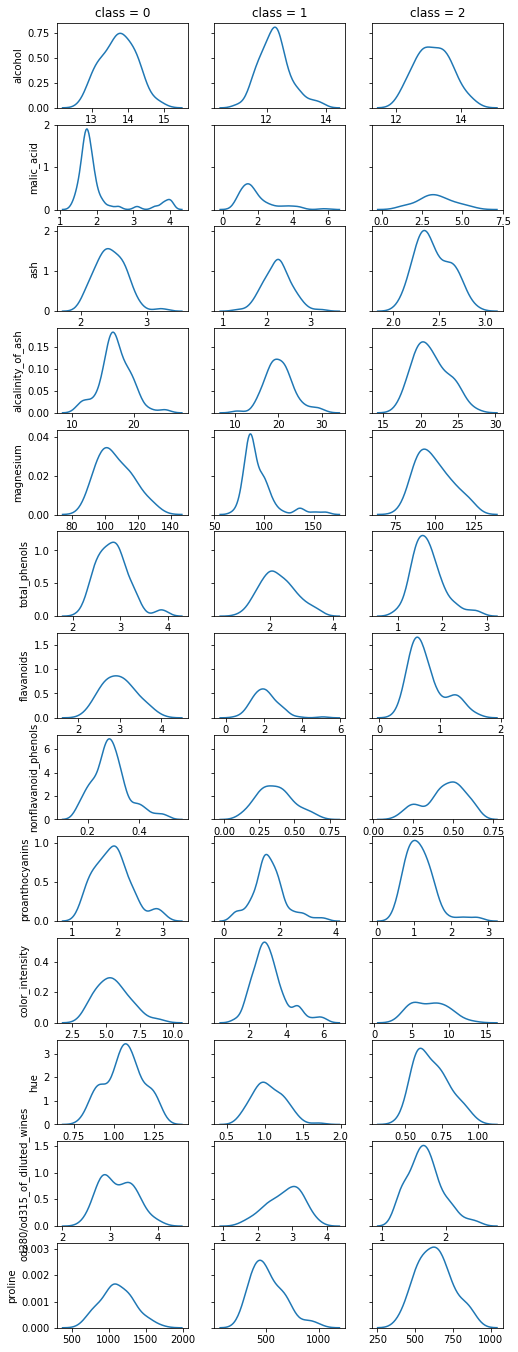

In [10]:
features = data.columns[:-1]
fig, axes = plt.subplots(len(features), 3, figsize=(8,24), sharey='row')
axes[0,0].set_title('class = 0')
axes[0,1].set_title('class = 1')
axes[0,2].set_title('class = 2')
for i in range(len(features)):
    axes[i, 0].set(ylabel=features[i])
    sns.kdeplot(data.loc[data['class']==0 , features[i]], ax=axes[i, 0], legend=False)
    sns.kdeplot(data.loc[data['class']==1 , features[i]], ax=axes[i, 1], legend=False)
    sns.kdeplot(data.loc[data['class']==2 , features[i]], ax=axes[i, 2], legend=False)


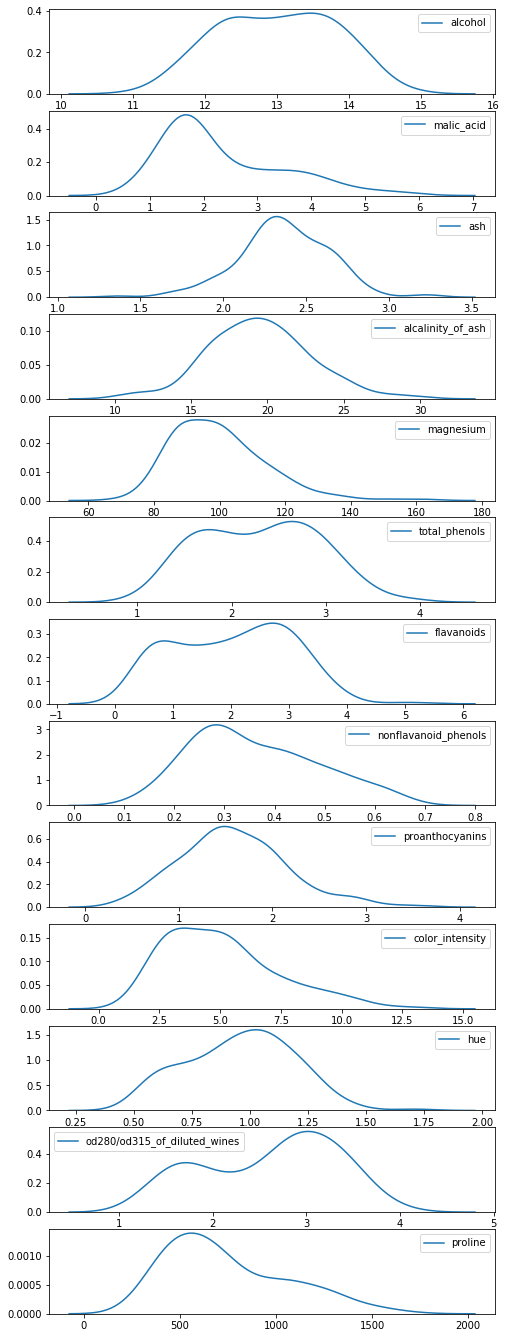

In [11]:
fig, axes = plt.subplots(len(features), 1, figsize=(8,24))
for i in range(len(features)):
    sns.kdeplot(data[features[i]], ax=axes[i])


Сделайте выводы о влиянии класса вина на вид графиков и по всей задаче

**Выводы:**
- Распределение значений некоторых признаков сильно зависит от класса наблюдения
- Наличие различных классов ведёт к би-модальности распределений отдельных признаков: отдельно по классам распределения имеют один пик, совместо - больше одного
- Из вышеизложенного следует, что некоторые факторы (чьё распределение разнится по классам) могут оказаться хорошо разделяющими классы